# Plotly

We explore plotly capabilites, its main features, workarounds and limitations

In [1]:
# ignore warnings to look nice ;)
import warnings
from plasma import plasma
warnings.simplefilter("ignore")

In [97]:
# data manipulation
import pandas as pd

# low level plotly objects
import plotly.graph_objects as go

# wrapper around high level methods
import plotly.express as px

# templates
import plotly.io as pio

# used mostly for secondary axis
from plotly.subplots import make_subplots

# days of week definitions
import calendar

# use colormap convinience functions
import seaborn as sns
import matplotlib.colors as color

# dark theme has a better contrast than plotly_light, the default theme
pio.templates.default = "plotly_dark"

# Github wont display HTML Figures
pio.renderers.default = "png"

In [3]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/WillKoehrsen/Data-Analysis/master/plotly/building_one.csv",
    header=[0, 1],
    index_col=0,
    parse_dates=True,
)

In [4]:
data.head()

type                StaticPressure                 Energy      Steam  \
sensor                           1         2            3          4   
measured_at                                                            
2017-12-14 11:00:00       0.806723  1.500570  6035.214040  13.164377   
2017-12-14 11:15:00       0.789395  1.490740  6182.405506  13.003065   
2017-12-14 11:30:00       0.792908  1.473761  6035.187942  12.617836   
2017-12-14 11:45:00       0.790165  1.485213  6035.192571  12.419816   
2017-12-14 12:00:00       0.786861  1.482015  6035.198581  12.975920   

type                            
sensor                       5  
measured_at                     
2017-12-14 11:00:00  10.367290  
2017-12-14 11:15:00   9.801097  
2017-12-14 11:30:00   9.794436  
2017-12-14 11:45:00   9.597848  
2017-12-14 12:00:00  10.041990

Lets not use multiindex. It doesnt actually bring anything to the table, and doesnt bode well with plotly at all.

In [5]:
data.columns = ["_".join(x).lower() for x in data.columns.values.tolist()]


In [6]:
data.head()

,staticpressure_1,staticpressure_2,energy_3,steam_4,steam_5
measured_at,,,,,
2017-12-14 11:00:00,0.806723,1.500570,6035.214040,13.164377,10.367290
2017-12-14 11:15:00,0.789395,1.490740,6182.405506,13.003065,9.801097
2017-12-14 11:30:00,0.792908,1.473761,6035.187942,12.617836,9.794436
2017-12-14 11:45:00,0.790165,1.485213,6035.192571,12.419816,9.597848
2017-12-14 12:00:00,0.786861,1.482015,6035.198581,12.975920,10.041990


# Plotly Cookbook


## Single line
When theres just one line and `y` is None, it shows `variable` as the legend name and `value` as the y-axis title. The legend is not necessary and the y-axis should be variable name.

Avoid using `y=None`. 

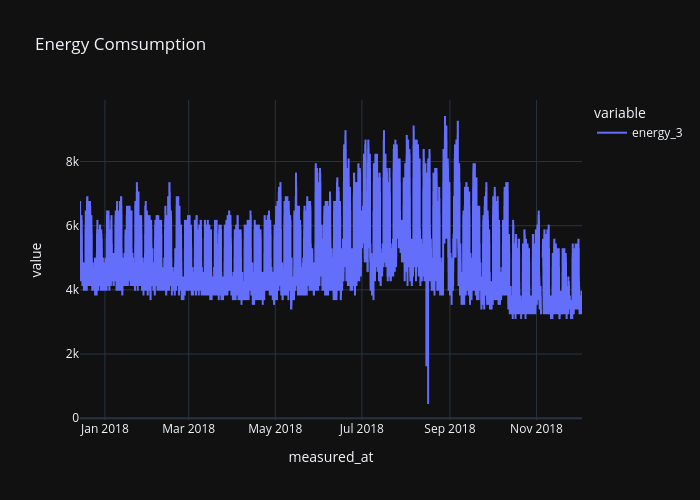

In [7]:
data.energy_3.plot(title="Energy Comsumption")

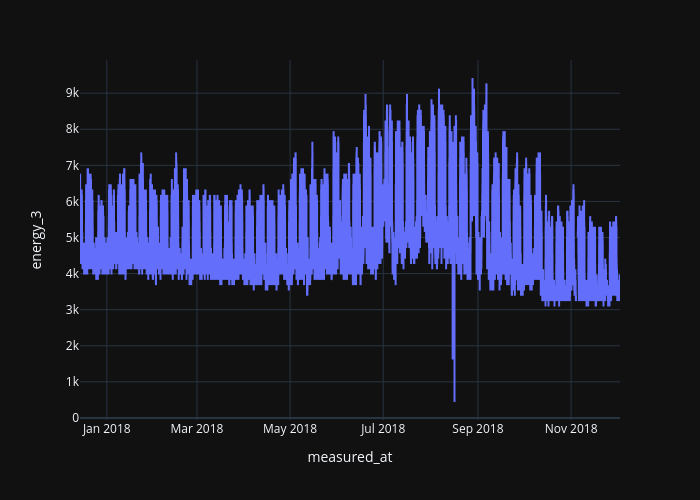

In [8]:
px.line(data,y='energy_3')

## Multiple lines
Works fine when the lines have the same scaling. When they dont, the y-axis is scaled to the largest line.

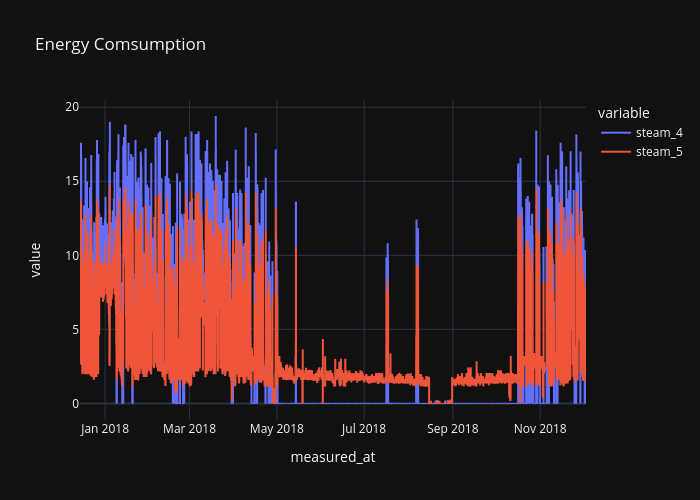

In [9]:
px.line(data, y=["steam_4", "steam_5"], title="Energy Comsumption")

Unfortunately, theres no elegant solution for secondary, indepedent, y axis, if the variables dont have the same scaling

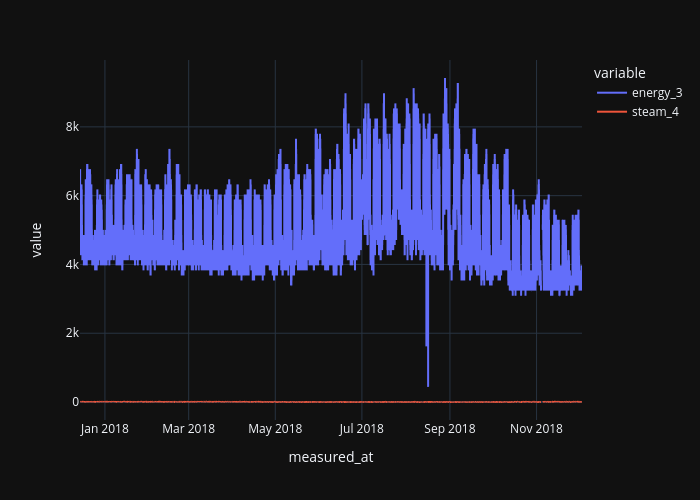

In [10]:
px.line(data, y=["energy_3", "steam_4"])

We can still create plotly objects directly, and use the `secondary_y` property with [make_subplots](https://plotly.com/python/subplots/).

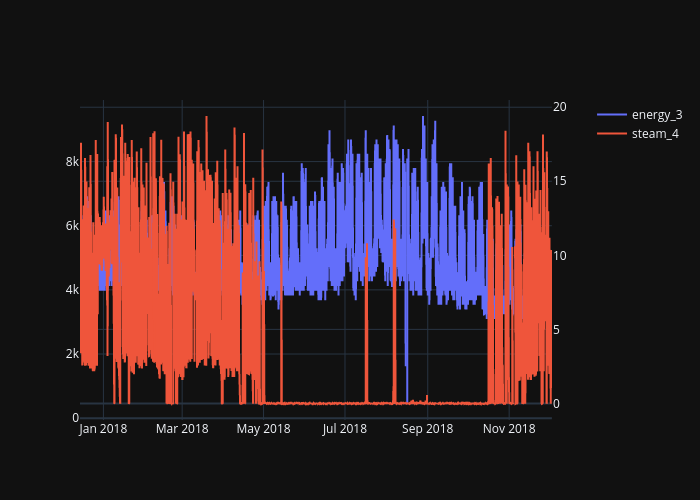

In [99]:
subplot_figure = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

subplot_figure = subplot_figure.add_trace(
    go.Scatter(x=data.index, y=data.energy_3, name="energy_3"), secondary_y=False
)

subplot_figure = subplot_figure.add_trace(
    go.Scatter(x=data.index, y=data.steam_4, name="steam_4"), secondary_y=True
)
subplot_figure


Which gets wrapped around `plasma.plot_line_with_secondary_y`

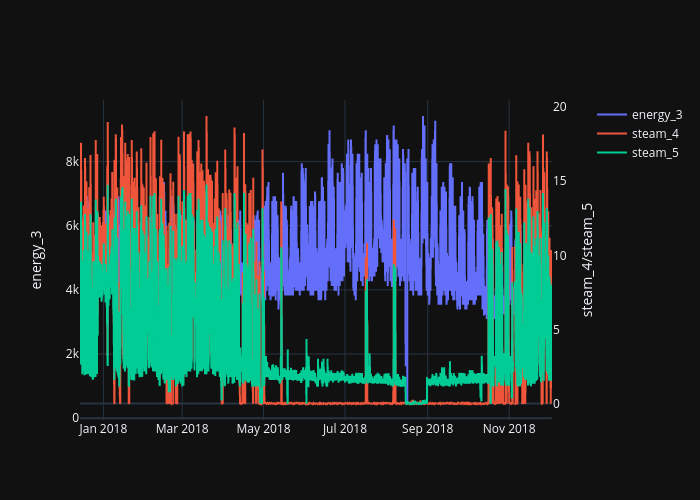

In [37]:
plasma.plot_line_with_secondary_y(data, ["energy_3"], ["steam_4","steam_5"])

# Labels
Plotly defaults for labels are very clumsy

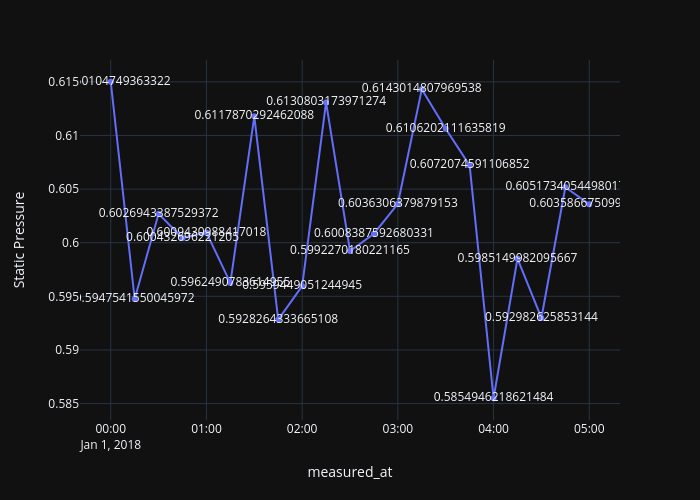

In [101]:
px.line(
    data.loc["2018-01-01 00:00:00":"2018-01-01 05:00:00"].reset_index(),
    x="measured_at",
    y="staticpressure_1",
    text="staticpressure_1",
    labels={"staticpressure_1": "Static Pressure"},
)

We can fix them with `update_` statements, which are also confusing.

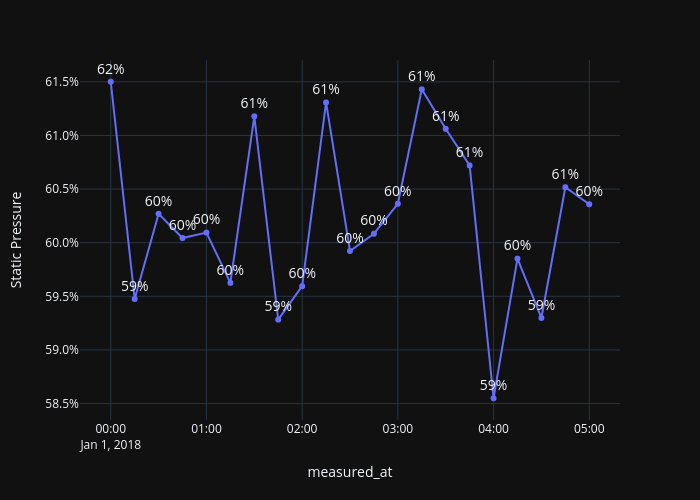

In [56]:
px.line(
    data.loc["2018-01-01 00:00:00":"2018-01-01 05:00:00"].reset_index(),
    x="measured_at",
    y="staticpressure_1",
    text="staticpressure_1",
    labels={"staticpressure_1": "Static Pressure"},
).update_traces(
    texttemplate="%{text:.0%}",
    textposition="top center",
    textfont=go.scatter.Textfont(size=14), # could also be just {"size": 14}
).update_yaxes(tickformat=".1%")

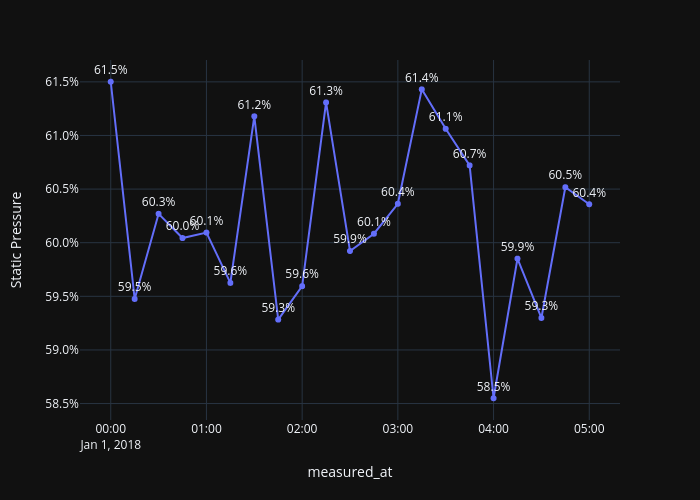

In [132]:
plasma.overload_fig()
px.line(
    data.loc["2018-01-01 00:00:00":"2018-01-01 05:00:00"].reset_index(),
    x="measured_at",
    y="staticpressure_1",
    text="staticpressure_1",
    labels={"staticpressure_1": "Static Pressure"},
).fix_labels()

In [94]:
annotated_data = data.loc["2018-02-05":"2018-02-06"].copy()
greatest_staticpressure1_position = annotated_data.staticpressure_1.argmax()
greatest_staticpressure = annotated_data.iloc[greatest_staticpressure1_position]
greatest_staticpressure
annotated_data.loc[
    greatest_staticpressure.name, "annotation"
] = greatest_staticpressure.staticpressure_1
annotated_data.annotation


measured_at
2018-02-05 00:00:00    <NA>
2018-02-05 00:15:00    <NA>
2018-02-05 00:30:00    <NA>
2018-02-05 00:45:00    <NA>
2018-02-05 01:00:00    <NA>
                       ... 
2018-02-06 22:45:00    <NA>
2018-02-06 23:00:00    <NA>
2018-02-06 23:15:00    <NA>
2018-02-06 23:30:00    <NA>
2018-02-06 23:45:00    <NA>
Name: annotation, Length: 192, dtype: object

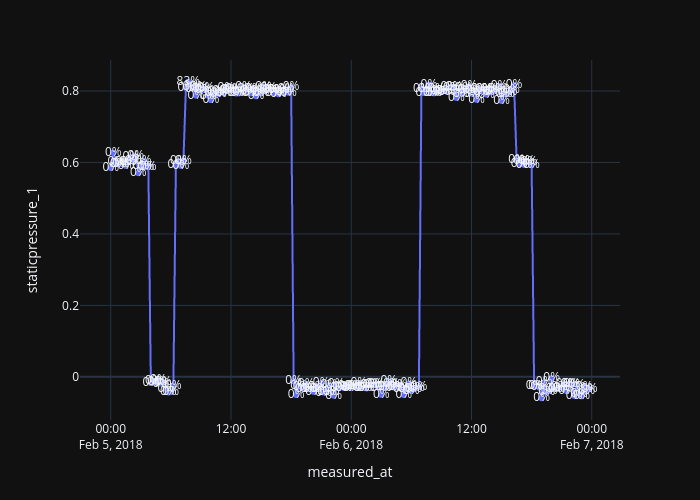

In [96]:
px.line(annotated_data, y="staticpressure_1", text="annotation").update_traces(
    texttemplate="%{text:.0%}",
)


In [15]:
def _get_daily_max(day_df: pd.DataFrame) -> pd.DataFrame:
    max_values = day_df.steam_4.max()
    max_index = day_df.iloc[day_df.steam_4.argmax()].measured_at
    return pd.DataFrame(
        [[max_values, max_index]], columns=["max_value", "max_value_timestamp"]
    )


data["annotation"] = (
    (data.reset_index().groupby(data.index.round("D")).apply(_get_daily_max))
    .set_index("max_value_timestamp", drop=False)
    .apply(
        lambda df: f"{df.max_value_timestamp.strftime('%a')} <br> {df.max_value_timestamp.strftime('%I:%M %p')} <br>{df.max_value:.1f} Mlbs/hr",
        axis=1,
    )
)


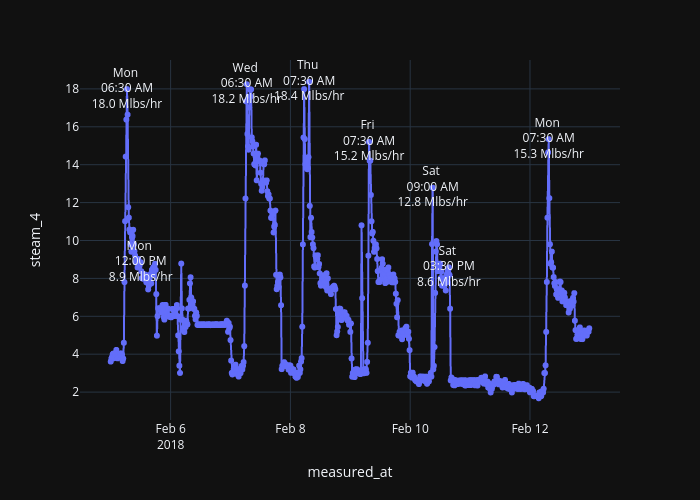

In [16]:
px.line(
    data.loc["2018-02-05":"2018-02-12"], y="steam_4", text="annotation"
)

# Colors

## Multiple Series
In the long format, one column contains the values, and another contains the group these values belong to.

This way, we want to have as many line charts as groups

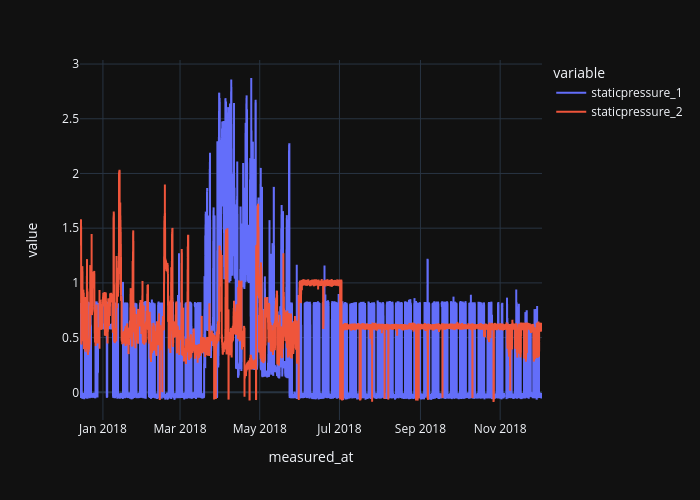

In [17]:
long_format = data.reset_index().melt(
    id_vars="measured_at", value_vars=["staticpressure_1", "staticpressure_2"]
)
px.line(
    long_format, x="measured_at", y="value", color="variable",
)

## Single series with multiple colors
This is specially cumbersome

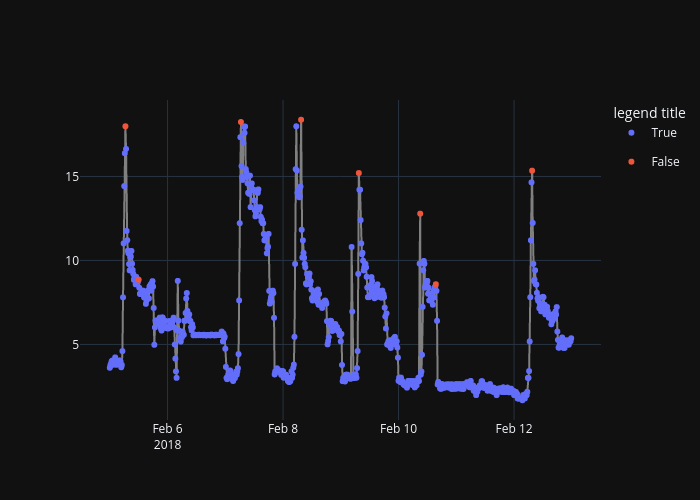

In [18]:
df = data.loc["2018-02-05":"2018-02-12"]
(
    go.Figure(go.Scatter(x=df.index, y=df.steam_4, marker=dict(color="grey"), name=""))
    .add_traces(px.scatter(df, y="steam_4", color=df.annotation.isnull()).data)
    .update_traces({"showlegend": False}, {"name": ""})
    .update_layout(legend_title_text="legend title")
)

## Seasonality 

### Hourly

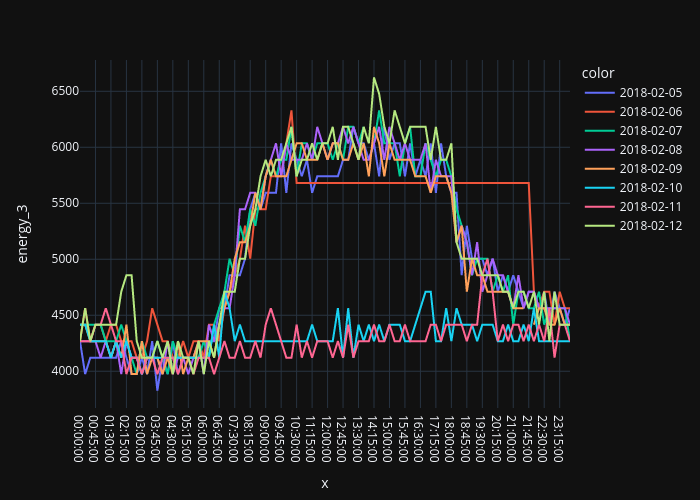

In [19]:
px.line(
    df.reset_index(), x=df.index.time, y="energy_3", color=df.index.date.astype(str)
)

In [20]:
df = data['2018-07-01':].resample("D").energy_3.mean()

### Day of week

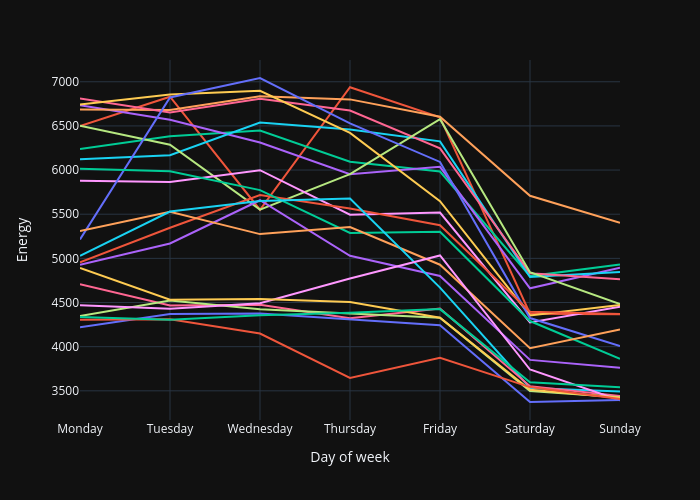

In [21]:
f = px.line(
    df,
    x=df.index.day_name(),
    y=df,
    color=df.index.week,
    category_orders={"x": list(calendar.day_name)},
    labels={"x": "Day of week", "y": "Energy"},
).update_layout(showlegend=False)
f

It is very cumbersome to add a continuous scale to the line groups, though

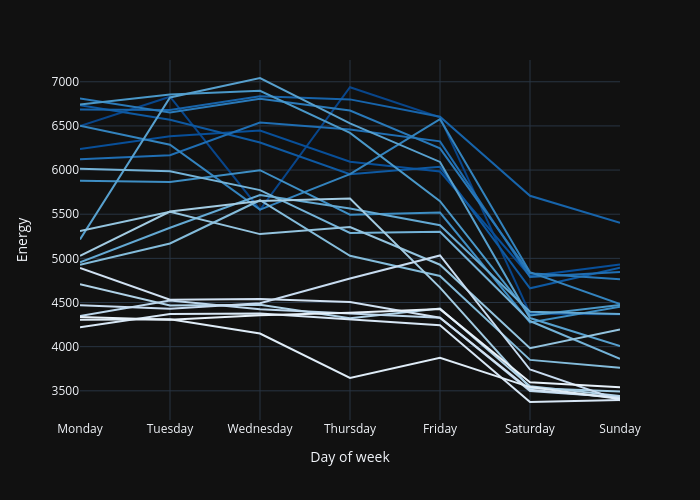

In [22]:
for index, color_tuple in enumerate(
    reversed(sns.color_palette("Blues", df.index.week.nunique()))
):
    f.data[index]["line"]["color"] = color.to_hex(color_tuple)

f

## Yearly

In [23]:
temperatures = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv",
    parse_dates=["Date"],
)

In [24]:
temperatures

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


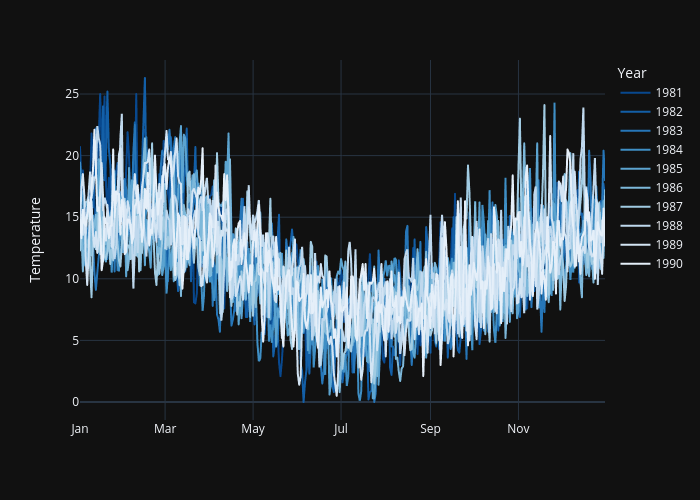

In [25]:
f = px.line(
    temperatures,
    x=temperatures.Date.dt.strftime("1990-%m-%d"),
    y="Temp",
    color=temperatures.Date.dt.year,
    labels={"x": "Month", "Temp": "Temperature", "color": "Year"},
).update_layout(xaxis=go.layout.XAxis(tickformat="%b"))
for index, color_tuple in enumerate(
    reversed(sns.color_palette("Blues", temperatures.Date.dt.year.nunique()))
):
    f.data[index]["line"]["color"] = color.to_hex(color_tuple)

f

# Histogram
## Discrete bins

Similar results can be achieved using `data.energy_3.hist()`

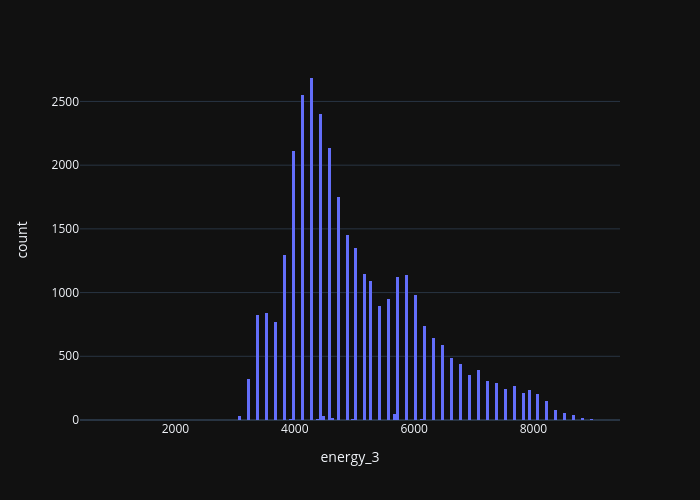

In [26]:
px.histogram(data, x="energy_3")

## Stacked bars

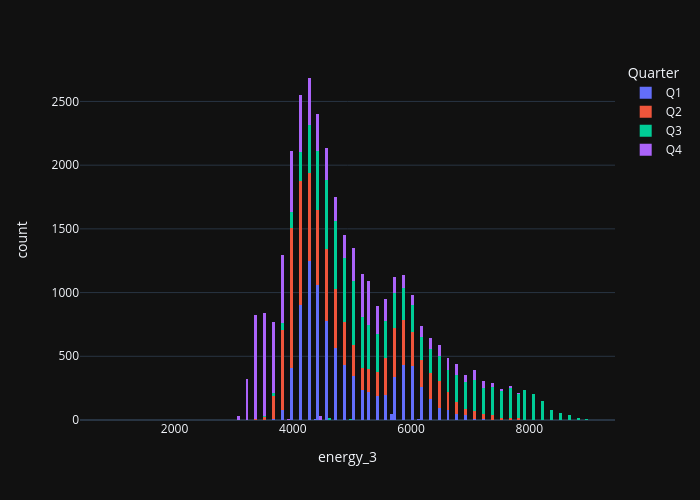

In [27]:
px.histogram(
    data,
    x="energy_3",
    color="Q" + data.index.quarter.astype("str").sort_values(),
    labels={"color": "Quarter"},
)

## Marginals

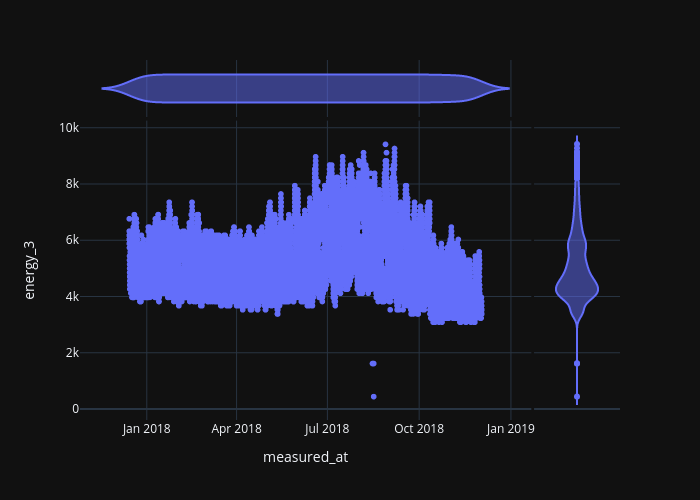

In [28]:
px.scatter(data, y="energy_3", marginal_y="violin", marginal_x="violin")

## Trendline

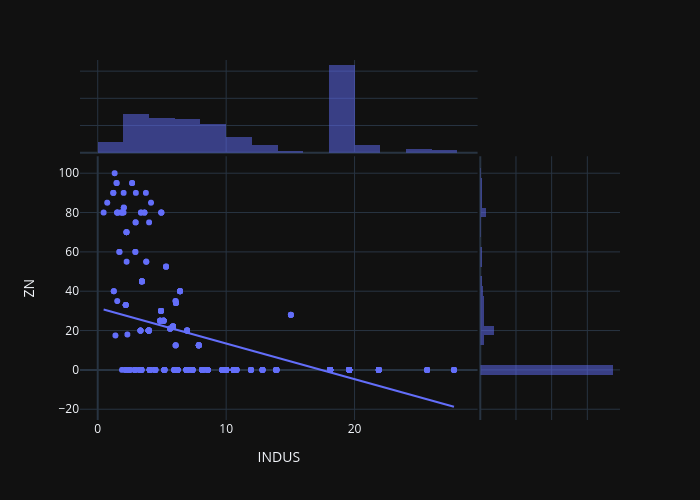

In [29]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

px.scatter(
    boston,
    x="INDUS",
    y="ZN",
    marginal_y="histogram",
    marginal_x="histogram",
    trendline="ols",
)

## Cumulative

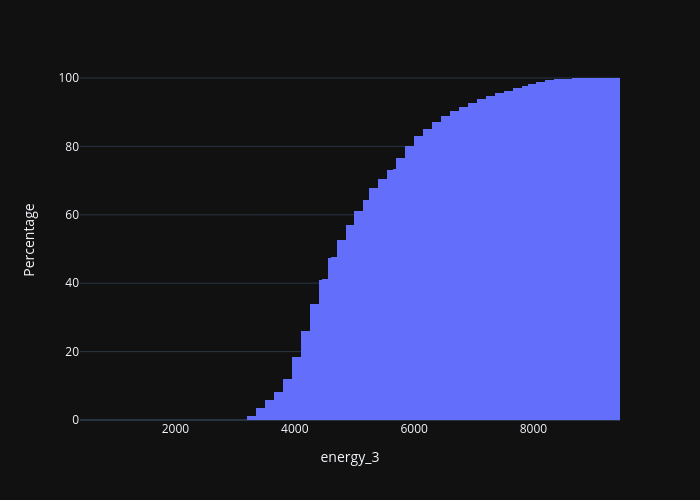

In [30]:
px.histogram(
    data,
    x="energy_3",
    histnorm="percent",
    cumulative=True,
    #    labels={"count": "percentage"}, this doesnt work
).update_layout(yaxis=go.layout.YAxis(title="Percentage"))

## Multiple histograms in y axis

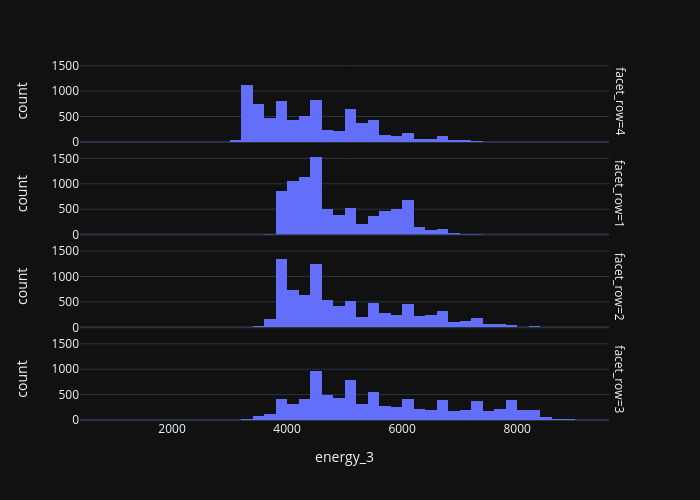

In [31]:
px.histogram(data, x="energy_3", facet_row=data.index.quarter, nbins=50)

## KDE
aka violin

### Grouped

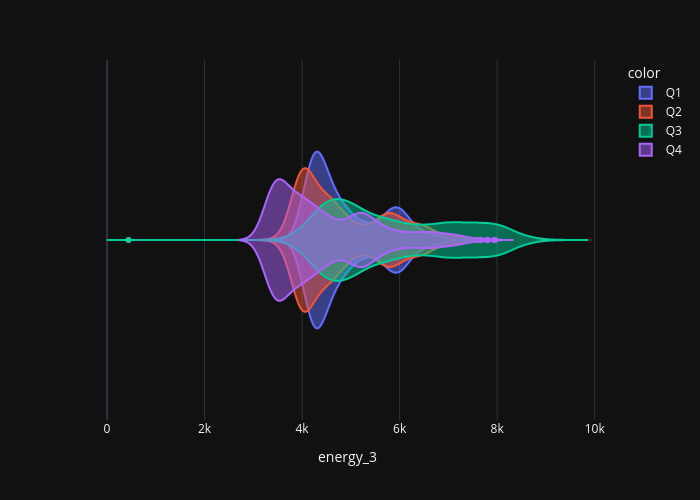

In [32]:
px.violin(
    data,
    x="energy_3",
    color="Q" + data.index.quarter.sort_values().astype(str),
    violinmode="overlay",
)

### Separated

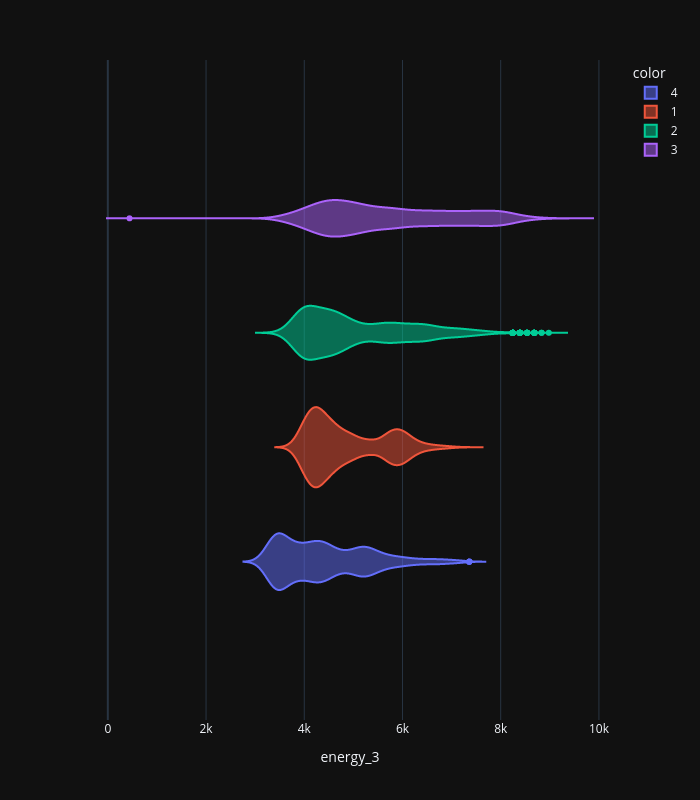

In [33]:
px.violin(data, x="energy_3", color=data.index.quarter, height=800)

# Discrete Heatmap

In [34]:
corr = boston.corr().reset_index().melt(id_vars="index")

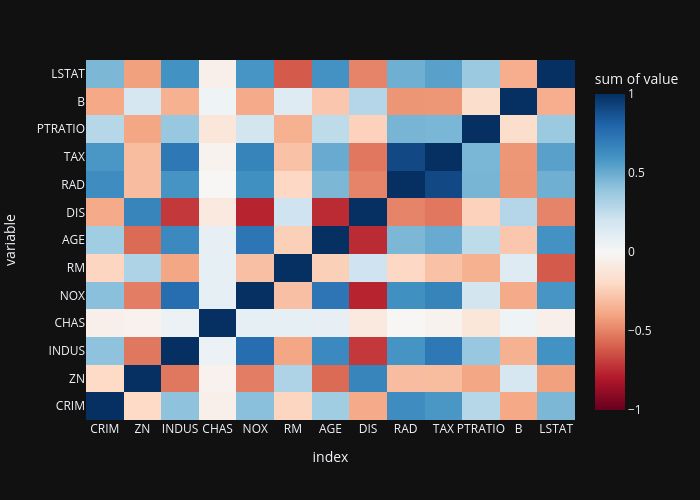

In [35]:
px.density_heatmap(
    corr,
    x="index",
    y="variable",
    z="value",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
)

<AxesSubplot:>

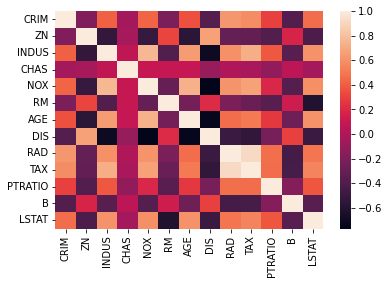

In [36]:
sns.heatmap(boston.corr())